[ WARN:0@0.020] global loadsave.cpp:268 findDecoder imread_('run-all/image_15.jpg'): can't open/read file: check file path/integrity


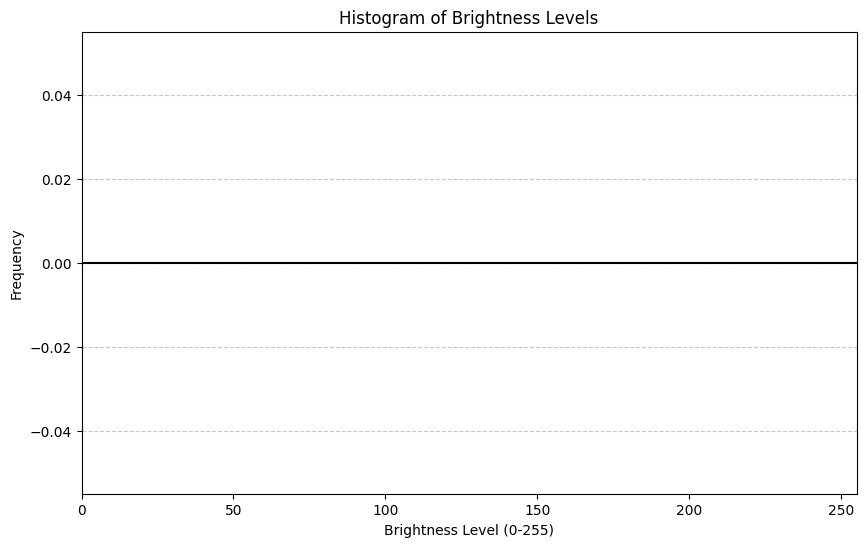

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "run-all/image_15.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram of Brightness Levels")
plt.xlabel("Brightness Level (0-255)")
plt.ylabel("Frequency")
plt.plot(histogram, color='black')
plt.xlim([0, 255])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2]:
import os
import numpy as np
np.save(os.path.join("run-all", "star_map_size_squared.npy"), 216442004)

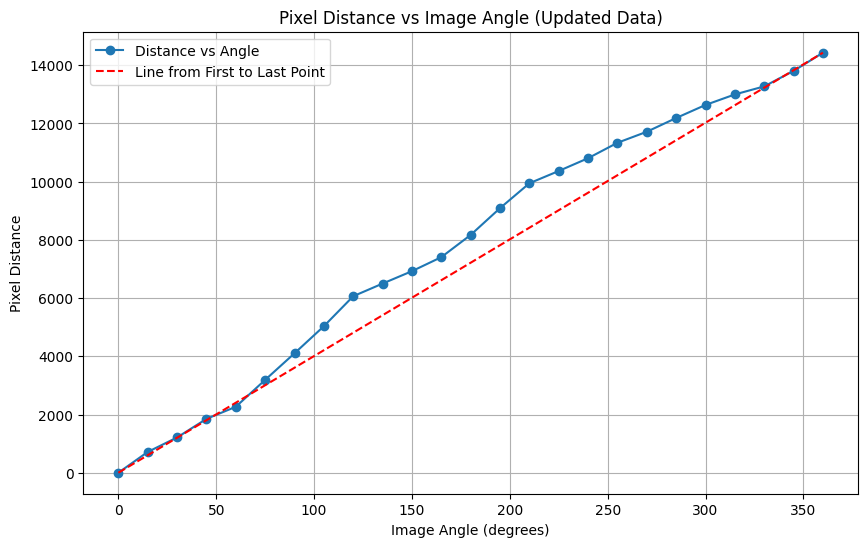

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data
# px_distance_current = np.sqrt([
#     0, 562472, 2494993, 6372781, 5499289, 18422881, 27668042, 34875985, 
#     42758498, 56887424, 83842433, 98536913, 115481306, 139610120, 156694333, 
#     181529842, 199117393, 232701313, 249951860, 271222276, 288971945, 
#     304254185, 344137352
# ])
# image_angles = [345, 330, 315, 300, 285, 270, 255, 240, 225, 210, 195, 180, 150, 135, 120, 105, 90, 75, 60, 45, 30, 15, 0]


px_distance_current = np.sqrt([0, 510580, 1467016, 3422329, 5132833, 10174932, 16834408, 25334608, 36768474, 42224285, 47945378, 54841960, 66727946, 82606628, 98874068, 107453362, 116751002, 128482345, 137208530, 148499585, 159628410, 168895946, 176163145, 190526653, 208197197])
image_angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]

# Plot with updated data and connecting line
plt.figure(figsize=(10, 6))
plt.plot(image_angles, px_distance_current, marker='o', label="Distance vs Angle")
plt.plot([image_angles[0], image_angles[-1]], 
         [px_distance_current[0], px_distance_current[-1]], 
         linestyle='--', color='red', label="Line from First to Last Point")

# Labels and Title
plt.xlabel("Image Angle (degrees)")
plt.ylabel("Pixel Distance")
plt.title("Pixel Distance vs Image Angle (Updated Data)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [3]:
import extractDescpriptors

extractDescpriptors.analyse("star_data/image_75.jpg", ".", True)

[[-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 ...
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]]
INFO: Using remapping
descriptors: 22


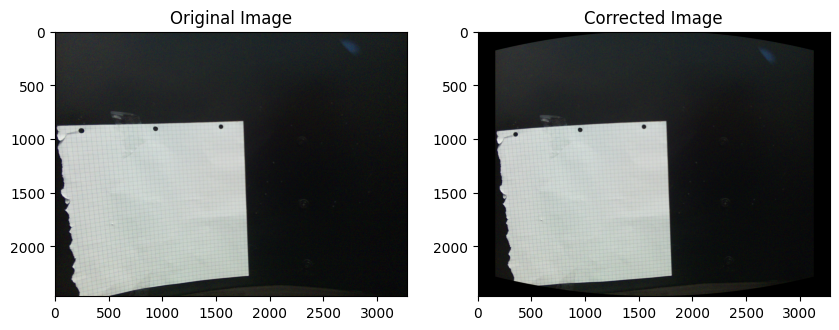

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Simulated distortion correction function
def correct_distortion(image, x_distortion_strength=0.1, y_distortion_strength=0.1):
    """
    Correct the X-direction and Y-direction distortion in an image.
    - X-direction distortion correction makes the edges of the image appear further away.
    - Y-direction distortion correction increases the Y-coordinate near the top and bottom edges.
    
    :param image: Input image (2D or 3D numpy array)
    :param x_distortion_strength: Strength of the X distortion to correct.
    :param y_distortion_strength: Strength of the Y distortion to correct.
    :return: Corrected image.
    """
    h, w = image.shape[:2]
    
    # Create mapping arrays for x and y
    map_x = np.zeros((h, w), dtype=np.float32)
    map_y = np.zeros((h, w), dtype=np.float32)
    
    # Fill in the mapping arrays
    for i in range(h):
        for j in range(w):
            # Distorted X-coordinate
            x = j / w * 2 - 1  # Normalize to range [-1, 1]
            corrected_x = x / (1 + x_distortion_strength * x**2)
            map_x[i, j] = (corrected_x + 1) * w / 2  # Map back to pixel coordinates
            
            # Distorted Y-coordinate
            y = i / h * 2 - 1  # Normalize to range [-1, 1]
            # y = 1 -abs(x)
            corrected_y = y / (1 + y_distortion_strength * x**2)  # Stretch near the borders
            map_y[i, j] = (corrected_y + 1) * h / 2  # Map back to pixel coordinates

    # Apply remapping
    np.save("map_x.npy", map_x)
    np.save("map_y.npy", map_y)
    corrected_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)
    return corrected_image

def barrel_distortion(image, k=0.00001):
    h, w = image.shape[:2]
    # Generate distortion map
    map_x, map_y = np.meshgrid(np.arange(w), np.arange(h))
    map_x = map_x.astype(np.float32)
    map_y = map_y.astype(np.float32)
    
    # Normalize coordinates to range [-1, 1]
    x = (map_x - w / 2) / (w / 2)
    y = (map_y - h / 2) / (h / 2)
    
    # Compute radius
    r = np.sqrt(x**2 + y**2)
    
    # Apply distortion formula
    x_distorted = x * (1 + k * r**2)
    y_distorted = y * (1 + k * r**2)
    
    # Convert back to pixel coordinates
    map_x = (x_distorted * (w / 2) + w / 2).astype(np.float32)
    map_y = (y_distorted * (h / 2) + h / 2).astype(np.float32)
    
    np.save("map_x.npy", map_x)
    np.save("map_y.npy", map_y)

    # Apply remap function
    distorted_image = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
    return distorted_image

# Load an example image (or replace with your data)
image = cv2.imread("cal/cal.jpg")  # Replace with your image path
corrected_image = correct_distortion(image, x_distortion_strength=-0.12, y_distortion_strength=-0.18)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Corrected Image")
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.show()


Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  6.522468512998256
Angle:  15 Distance:  871 Distance in degree:  16.57819604525748 error:  -1.5781960452574815
y_fit:  -0.9347408681865446
Angle:  30 Distance:  1533 Distance in degree:  29.17838638045892 error:  0.821613619541079
y_fit:  -2.039850049972955
Angle:  45 Distance:  2212 Distance in degree:  42.102146558105105 error:  2.8978534418948954
y_fit:  -2.7622214719692764
Angle:  60 Distance:  2938 Distance in degree:  55.920482182510305 error:  4.079517817489695
y_fit:  -3.7520734366377155
Angle:  75 Distance:  3616 Distance in degree:  68.82520884001269 error:  6.174791159987308
y_fit:  -2.9857577540633997
Angle:  90 Distance:  4317 Distance in degree:  82.16770646082267 error:  7.8322935391773285
y_fit:  -2.06123485148575
Angle:  105 Distance:  5163 Distance in degree:  98.27006450248493 error:  6.729935497515072
y_fit:  -3.2786849073275306
Angle:  120 Distance:  5949 Distance in degree:  113.23041133551867 err

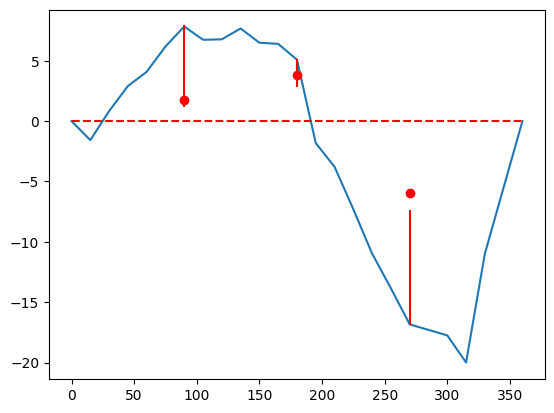

In [18]:
import matplotlib.pyplot as plt
import os

distances = [0, 871, 1533, 2212, 2938, 3616, 4317, 5163, 5949, 6690, 7540, 8333, 9190, 10341, 11232, 12205, 13186, 14125, 15070, 16694, 17600, 17915, 18914]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18914*360, "error: ", (angles[i] - d/18914*360))
    errors.append(angles[i] - d/18914*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
# plt.plot(angles[1:-1], fitted[1:-1], label="Fitted error")
plt.plot([90, 180, 270], [90 - 4639/18914*360, 180- 9255/18914*360, 270- 14499/18914*360], 'ro', label="90, 180, 270")
#difference between 90, 180, 270 and fitted as vertical line
plt.plot([90, 90], [90 - 4317/18914*360, 90 - 4639/18813*360], 'r-')
plt.plot([180, 180], [180 - 9190/18914*360, 180 - 9255/18813*360], 'r-')
plt.plot([270, 270], [270 - 15070/18914*360, 270 - 14499/18813*360], 'r-')
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  11.745240055601904
Angle:  15 Distance:  904 Distance in degree:  17.915772089182493 error:  -2.915772089182493
y_fit:  1.74718671108144
Angle:  30 Distance:  1537 Distance in degree:  30.460776218001655 error:  -0.460776218001655
y_fit:  0.2516093348823816
Angle:  45 Distance:  2153 Distance in degree:  42.668868703550785 error:  2.3311312964492146
y_fit:  -0.060553783973603004
Angle:  60 Distance:  2847 Distance in degree:  56.422791081750624 error:  3.577208918249376
y_fit:  -1.497680504456703
Angle:  75 Distance:  3470 Distance in degree:  68.76961189099917 error:  6.2303881090008275
y_fit:  -0.573401955863261
Angle:  90 Distance:  4120 Distance in degree:  81.65152766308836 error:  8.348472336911641
y_fit:  0.37022730181658403
Angle:  105 Distance:  4972 Distance in degree:  98.53674649050372 error:  6.463253509496283
y_fit:  -2.1749442125049256
Angle:  120 Distance:  5734 Distance in degree:  113.63831544178366 e

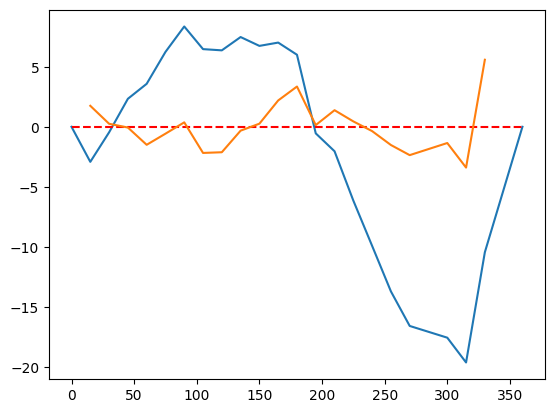

In [31]:
import matplotlib.pyplot as plt
import os

distances = [0, 904, 1537, 2153, 2847, 3470, 4120, 4972, 5734, 6435, 7229, 7972, 8780, 9867, 10699, 11663, 12610, 13558, 14460, 16023, 16884, 17178, 18165]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18165*360, "error: ", (angles[i] - d/18165*360))
    errors.append(angles[i] - d/18165*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles[1:-1], fitted[1:-1], label="Fitted error")
plt.show()



Angle:  19 Distance:  0 Distance in degree:  -0.0 error:  19.0
y_fit:  25.958039648997183
Angle:  33 Distance:  -935 Distance in degree:  17.508102268635216 error:  15.491897731364784
y_fit:  67.98737745770808
Angle:  51 Distance:  -1774 Distance in degree:  33.218581202736765 error:  17.781418797263235
y_fit:  113.00245160906499
Angle:  66 Distance:  -2512 Distance in degree:  47.037810586964355 error:  18.962189413035645
y_fit:  153.328630643795
Angle:  81 Distance:  -3023 Distance in degree:  56.60640979474253 error:  24.393590205257468
y_fit:  186.77035502261626
Angle:  95 Distance:  -3841 Distance in degree:  71.92365862441484 error:  23.07634137558516
y_fit:  231.9154935540289
Angle:  111 Distance:  -4457 Distance in degree:  83.45840835433921 error:  27.541591645660787
y_fit:  272.75136008476943
Angle:  122 Distance:  -5154 Distance in degree:  96.50990277277637 error:  25.49009722722363
y_fit:  313.35527946038496
Angle:  140 Distance:  -6085 Distance in degree:  113.94310406913

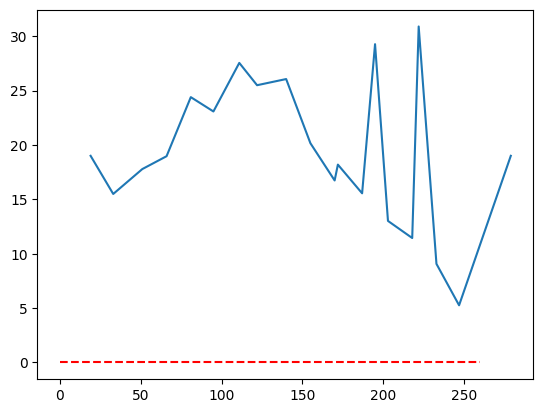

In [34]:
import matplotlib.pyplot as plt
import os

distances = [0, -935, -1774, -2512, -3023, -3841, -4457, -5154, -6085, -7201, -8185, -8214, -9156, -8851, -10146, -11031, -10206, -11959, -12910, -13885]
angles = [19, 33, 51, 66, 81, 95, 111, 122, 140, 155, 170, 172, 187, 195, 203, 218, 222, 233, 247, 279]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/-13885*260, "error: ", (angles[i] - d/-13885*260))
    errors.append(angles[i] - d/-13885*260 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 260], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
# plt.plot(angles[1:-1], fitted[1:-1], label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  6.958039648997182
Angle:  15 Distance:  720 Distance in degree:  14.584740040513166 error:  0.4152599594868338
y_fit:  1.7582210307987118
Angle:  30 Distance:  1340 Distance in degree:  27.14382174206617 error:  2.8561782579338306
y_fit:  0.2605452315379999
Angle:  45 Distance:  1944 Distance in degree:  39.37879810938555 error:  5.621201890614451
y_fit:  -0.0656261656368855
Angle:  60 Distance:  2624 Distance in degree:  53.15327481431465 error:  6.846725185685351
y_fit:  -1.4997716880011112
Angle:  75 Distance:  3234 Distance in degree:  65.50979068197164 error:  9.490209318028363
y_fit:  -0.556735195607402
Angle:  90 Distance:  3872 Distance in degree:  78.43349088453748 error:  11.566509115462523
y_fit:  0.3789649377935831
Angle:  105 Distance:  4711 Distance in degree:  95.42876434841322 error:  9.571235651586775
y_fit:  -2.2172103425786958
Angle:  120 Distance:  5458 Distance in degree:  110.56043214044564 error:

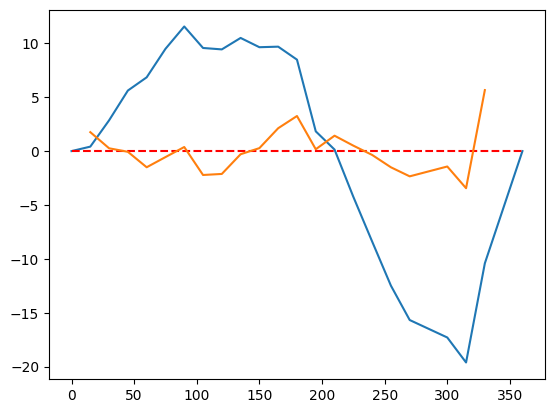

In [35]:
import matplotlib.pyplot as plt
import os

distances = [0, 720, 1340, 1944, 2624, 3234, 3872, 4711, 5458, 6146, 6929, 7667, 8467, 9536, 10360, 11317, 12262, 13205, 14103, 15664, 16519, 16805, 17772]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/17772*360, "error: ", (angles[i] - d/17772*360))
    errors.append(angles[i] - d/17772*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles[1:-1], fitted[1:-1], label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  5.564473263503825
Angle:  15 Distance:  732 Distance in degree:  16.588190859876622 error:  -1.5881908598766223
y_fit:  -0.3421233172228426
Angle:  30 Distance:  1352 Distance in degree:  30.638297872340424 error:  -0.6382978723404236
y_fit:  -2.0007590208428496
Angle:  45 Distance:  1937 Distance in degree:  43.89525368248773 error:  1.104746317512273
y_fit:  -1.9159386458516252
Angle:  60 Distance:  2609 Distance in degree:  59.12375676696462 error:  0.8762432330353818
y_fit:  -3.178989553274519
Angle:  75 Distance:  3196 Distance in degree:  72.42603550295858 error:  2.573964497041416
y_fit:  -1.7026226301473173
Angle:  90 Distance:  3810 Distance in degree:  86.34017373788241 error:  3.6598262621175905
y_fit:  -0.24760087802366115
Angle:  105 Distance:  4609 Distance in degree:  104.44668261362206 error:  0.553317386377941
y_fit:  -2.0850727015434245
Angle:  120 Distance:  5338 Distance in degree:  120.966889084728

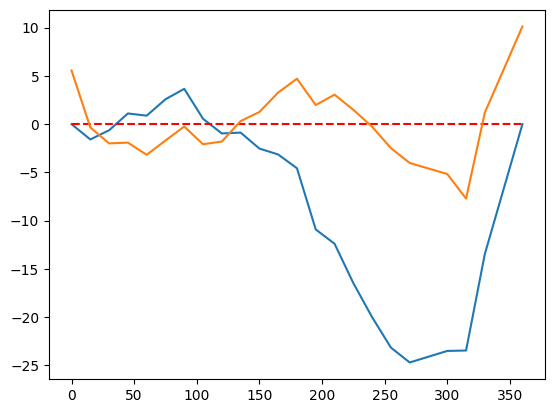

In [52]:
import matplotlib.pyplot as plt
import os

distances = [0, 732, 1352, 1937, 2609, 3196, 3810, 4609, 5338, 5996, 6731, 7420, 8145, 9087, 9814, 10656, 11474, 12275, 13005, 14276, 14936, 15156, 15886]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/15886*360, "error: ", (angles[i] - d/15886*360))
    errors.append(angles[i] - d/15886*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  6.522468512998256
Angle:  15 Distance:  882 Distance in degree:  16.877690958379844 error:  -1.8776909583798442
y_fit:  -1.2089329610841446
Angle:  30 Distance:  1534 Distance in degree:  29.354169988837505 error:  0.645830011162495
y_fit:  -2.063582990212865
Angle:  45 Distance:  2189 Distance in degree:  41.8880561313985 error:  3.1119438686015
y_fit:  -2.242175354848648
Angle:  60 Distance:  2902 Distance in degree:  55.53181310795726 error:  4.468186892042738
y_fit:  -2.9780275808359846
Angle:  75 Distance:  3561 Distance in degree:  68.14224206665604 error:  6.8577579333439616
y_fit:  -1.85470641251419
Angle:  90 Distance:  4245 Distance in degree:  81.23106362621591 error:  8.768936373784086
y_fit:  -0.6435694432994126
Angle:  105 Distance:  5094 Distance in degree:  97.4772763514591 error:  7.522723648540904
y_fit:  -1.9848294989766657
Angle:  120 Distance:  5877 Distance in degree:  112.46053261042896 error:  7

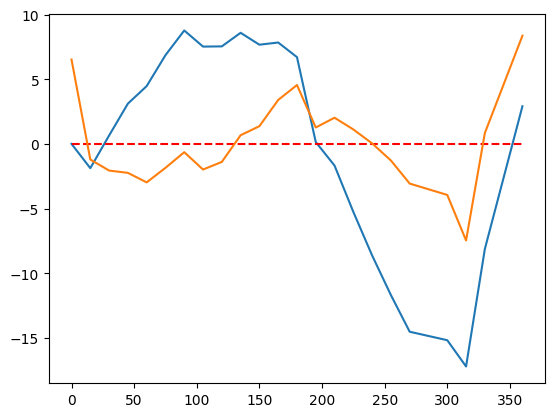

In [65]:
import matplotlib.pyplot as plt
import os

distances = [0, 882, 1534, 2189, 2902, 3561, 4245, 5094, 5877, 6606, 7438, 8213, 9056, 10183, 11062, 12033, 12993, 13937, 14869, 16471, 17361, 17670, 18661]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18813*360, "error: ", (angles[i] - d/18813*360))
    errors.append(angles[i] - d/18813*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  6.522468512998256
Angle:  15 Distance:  882 Distance in degree:  16.88936170212766 error:  -1.8893617021276583
y_fit:  -1.2089329610841446
Angle:  30 Distance:  1534 Distance in degree:  29.374468085106386 error:  0.6255319148936138
y_fit:  -2.063582990212865
Angle:  45 Distance:  2189 Distance in degree:  41.91702127659575 error:  3.0829787234042527
y_fit:  -2.242175354848648
Angle:  60 Distance:  2902 Distance in degree:  55.57021276595744 error:  4.429787234042557
y_fit:  -2.9780275808359846
Angle:  75 Distance:  3561 Distance in degree:  68.18936170212766 error:  6.8106382978723445
y_fit:  -1.85470641251419
Angle:  90 Distance:  4245 Distance in degree:  81.2872340425532 error:  8.712765957446805
y_fit:  -0.6435694432994126
Angle:  105 Distance:  5094 Distance in degree:  97.54468085106383 error:  7.455319148936169
y_fit:  -1.9848294989766657
Angle:  120 Distance:  5877 Distance in degree:  112.53829787234042 error

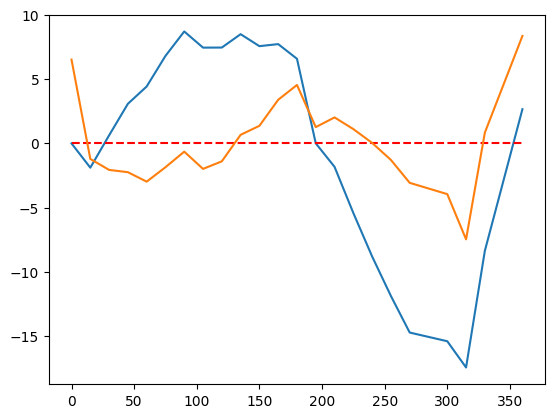

In [5]:
import matplotlib.pyplot as plt
import os

distances = [0, 882, 1534, 2189, 2902, 3561, 4245, 5094, 5877, 6606, 7438, 8213, 9056, 10183, 11062, 12033, 12993, 13937, 14869, 16471, 17361, 17670, 18661]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18800*360, "error: ", (angles[i] - d/18800*360))
    errors.append(angles[i] - d/18800*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  8.68322035757063
Angle:  15 Distance:  1040 Distance in degree:  20.270709258256634 error:  -5.270709258256634
y_fit:  -2.9310679124210672
Angle:  30 Distance:  1675 Distance in degree:  32.647536545749865 error:  -2.6475365457498654
y_fit:  -3.2263975514944434
Angle:  45 Distance:  2315 Distance in degree:  45.12181916621548 error:  -0.12181916621548083
y_fit:  -2.971116143081332
Angle:  60 Distance:  3012 Distance in degree:  58.707092582566325 error:  1.2929074174336748
y_fit:  -3.32243571834006
Angle:  75 Distance:  3658 Distance in degree:  71.29832160259882 error:  3.7016783974011815
y_fit:  -1.9485867536087795
Angle:  90 Distance:  4327 Distance in degree:  84.33784515430428 error:  5.662154845695724
y_fit:  -0.5070929819039236
Angle:  105 Distance:  5156 Distance in degree:  100.49593936112615 error:  4.504060638873852
y_fit:  -1.6145393055350894
Angle:  120 Distance:  5923 Distance in degree:  115.445587439090

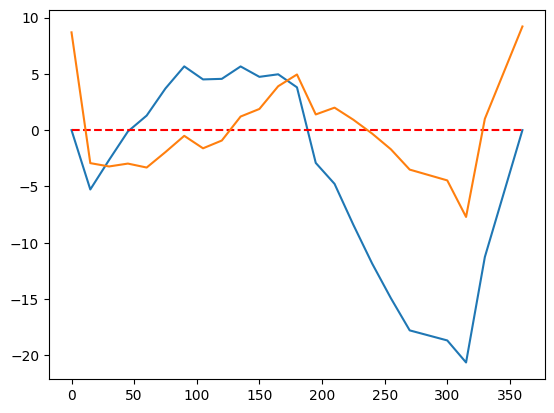

In [6]:
import matplotlib.pyplot as plt
import os

distances = [0, 1040, 1675, 2315, 3012, 3658, 4327, 5156, 5923, 6636, 7453, 8211, 9040, 10154, 11019, 11975, 12921, 13849, 14765, 16350, 17220, 17509, 18470]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18470*360, "error: ", (angles[i] - d/18470*360))
    errors.append(angles[i] - d/18470*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  8.338084885373837
Angle:  15 Distance:  989 Distance in degree:  19.502629272567923 error:  -4.502629272567923
y_fit:  -2.38049986127114
Angle:  30 Distance:  1632 Distance in degree:  32.182296231375986 error:  -2.182296231375986
y_fit:  -3.096175859625312
Angle:  45 Distance:  2269 Distance in degree:  44.74364592462752 error:  0.256354075372478
y_fit:  -2.9498276282306293
Angle:  60 Distance:  2968 Distance in degree:  58.52760736196319 error:  1.4723926380368084
y_fit:  -3.495524968633866
Angle:  75 Distance:  3605 Distance in degree:  71.08895705521472 error:  3.9110429447852795
y_fit:  -2.03518360943076
Angle:  90 Distance:  4263 Distance in degree:  84.06441717791411 error:  5.935582822085891
y_fit:  -0.4536219843638776
Angle:  105 Distance:  5089 Distance in degree:  100.3527607361963 error:  4.647239263803698
y_fit:  -1.5739455330256362
Angle:  120 Distance:  5859 Distance in degree:  115.53680981595092 error:

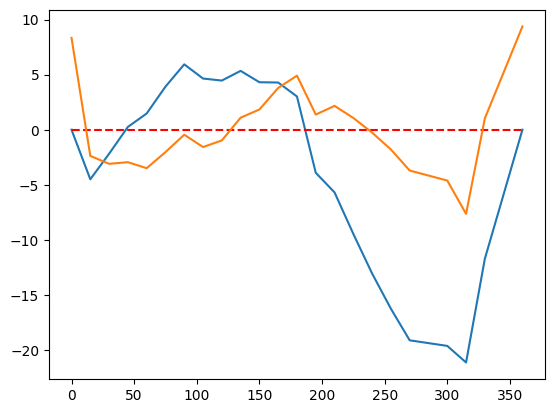

In [ ]:
import matplotlib.pyplot as plt
import os

distances = [0, 989, 1632, 2269, 2968, 3605, 4263, 5089, 5859, 6575, 7388, 8150, 8975, 10087, 10938, 11890, 12833, 13756, 14662, 16209, 17046, 17329, 18256]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18256*360, "error: ", (angles[i] - d/18256*360))
    errors.append(angles[i] - d/18256*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")

plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  9.033655356267746
Angle:  15 Distance:  879 Distance in degree:  16.82028384627651 error:  -1.82028384627651
y_fit:  -10.303617496729927
Angle:  30 Distance:  1247 Distance in degree:  23.862222930952004 error:  6.137777069047996
y_fit:  -7.901342444266959
Angle:  45 Distance:  1593 Distance in degree:  30.483176526869716 error:  14.516823473130284
y_fit:  -4.57516088243564
Angle:  60 Distance:  1951 Distance in degree:  37.33375857120077 error:  22.666241428799232
y_fit:  -2.0194448499163116
Angle:  75 Distance:  2249 Distance in degree:  43.036198373465155 error:  31.963801626534845
y_fit:  1.946962754760861
Angle:  90 Distance:  2535 Distance in degree:  48.50900972731622 error:  41.49099027268378
y_fit:  5.466645882853001
Angle:  105 Distance:  2885 Distance in degree:  55.20650613937171 error:  49.79349386062829
y_fit:  4.814386904652821
Angle:  120 Distance:  3173 Distance in degree:  60.71758890129166 error:  59

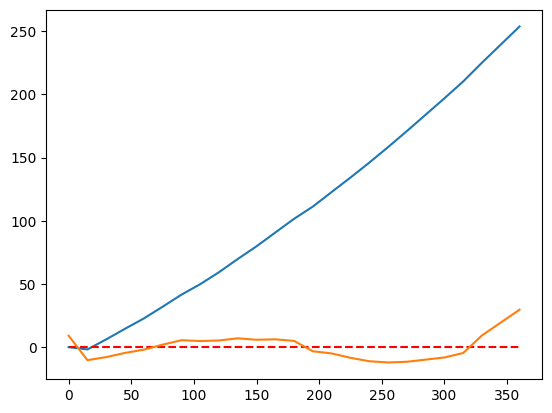

In [9]:
import matplotlib.pyplot as plt
import os

distances =  [0, 879, 1247, 1593, 1951, 2249, 2535, 2885, 3173, 3410, 3669, 3882, 4098, 4376, 4558, 4745, 4912, 5054, 5176, 5387, 5473, 5481, 5551]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18813*360, "error: ", (angles[i] - d/18813*360))
    errors.append(angles[i] - d/18813*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  6.522468512998256
Angle:  15 Distance:  666 Distance in degree:  12.07372343639843 error:  2.9262765636015704
y_fit:  4.217215585777936
Angle:  30 Distance:  1217 Distance in degree:  22.062644777923254 error:  7.9373552220767465
y_fit:  5.548488573225423
Angle:  45 Distance:  1946 Distance in degree:  35.27847718803505 error:  9.721522811964952
y_fit:  3.3049728040106032
Angle:  60 Distance:  2431 Distance in degree:  44.070903414241116 error:  15.929096585758884
y_fit:  7.328415423104424
Angle:  75 Distance:  3495 Distance in degree:  63.35985497028906 error:  11.640145029710943
y_fit:  -0.49209511471791245
Angle:  90 Distance:  4550 Distance in degree:  82.4856481015208 error:  7.514351898479205
y_fit:  -6.607212537996048
Angle:  120 Distance:  6949 Distance in degree:  125.97643267197098 error:  -5.976432671970983
y_fit:  -20.281161313363157
Angle:  135 Distance:  7518 Distance in degree:  136.29167086312822 error:

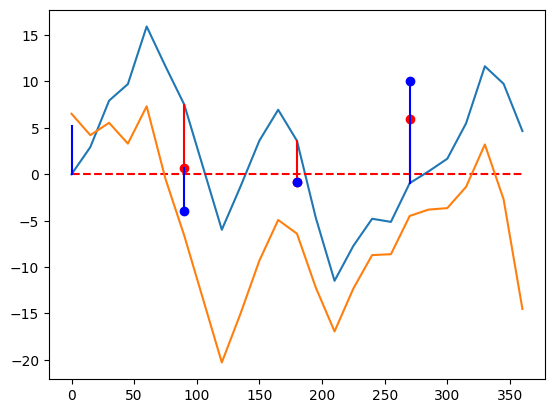

In [26]:
import matplotlib.pyplot as plt
import os

distances = [0, 666, 1217, 1946, 2431, 3495, 4550, 6949, 7518, 8074, 8718, 9730, 11014, 12217, 12837, 13503, 14349, 14946, 15704, 16456, 17073, 17561, 18493, 19601]
angles = [0, 15, 30, 45, 60, 75, 90, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/19858*360, "error: ", (angles[i] - d/19858*360))
    errors.append(angles[i] - d/19858*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")

plt.plot([90, 180, 270], [90 - 4927/19858*360, 180- 9975/19858*360, 270- 14567/19858*360], 'ro', label="90, 180, 270")
#difference between 90, 180, 270 and fitted as vertical line
plt.plot([90, 90], [90 - 4550/19858*360, 90 - 4927/19858*360], 'r-')
plt.plot([180, 180], [180 - 9730/19858*360, 180 - 9975/19858*360], 'r-')
plt.plot([270, 270], [270 - 14946/19858*360, 270 - 14567/19858*360], 'r-')

plt.plot([90, 180, 270], [90 - 5184/19858*360, 180- 9975/19858*360, 270- 14340/19858*360], 'bo', label="90, 180, 270")
#difference between 90, 180, 270 and fitted as vertical line
plt.plot([90, 90], [90 - 5184/19858*360, 90 - 4927/19858*360], 'b-')
plt.plot([0, 0], [0, 0 - -290/19858*360], 'b-')
plt.plot([270, 270], [270 - 14946/19858*360, 270 - 14340/19858*360], 'b-')
plt.show()



Angle:  19 Distance:  0 Distance in degree:  0.0 error:  19.0
y_fit:  25.522468512998255
Angle:  33 Distance:  934 Distance in degree:  17.03429758346421 error:  15.965702416535791
y_fit:  15.497964836198655
Angle:  51 Distance:  1772 Distance in degree:  32.31774659303916 error:  18.68225340696084
y_fit:  13.337294769567634
Angle:  66 Distance:  2510 Distance in degree:  45.7773950048128 error:  20.222604995187197
y_fit:  11.576028146649968
Angle:  81 Distance:  3020 Distance in degree:  55.07877805359947 error:  25.92122194640053
y_fit:  15.491896445406994
Angle:  95 Distance:  3836 Distance in degree:  69.96099093165813 error:  25.03900906834187
y_fit:  12.529867592182228
Angle:  111 Distance:  4451 Distance in degree:  81.17736460813617 error:  29.822635391863827
y_fit:  16.31663983963982
Angle:  122 Distance:  5146 Distance in degree:  93.85277876285525 error:  28.14722123714475
y_fit:  14.039640227400085
Angle:  140 Distance:  6077 Distance in degree:  110.83236232838544 error:  

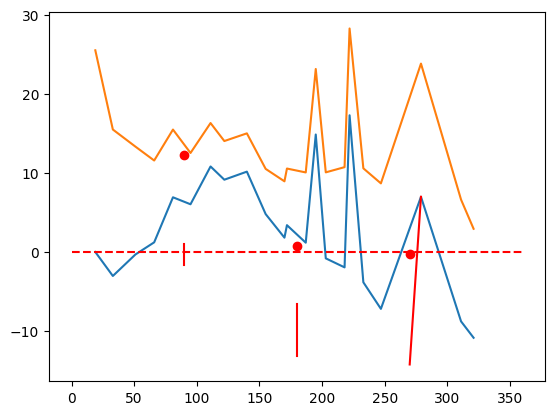

In [36]:
import matplotlib.pyplot as plt
import os

distances = [0, 934, 1772, 2510, 3020, 3836, 4451, 5146, 6077, 7194, 8180, 8203, 9147, 8835, 10133, 11018, 10182, 11944, 12896, 13873, 16492, 17154]
angles = [19, 33, 51, 66, 81, 95, 111, 122, 140, 155, 170, 172, 187, 195, 203, 218, 222, 233, 247, 279, 311, 321]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/19739*360, "error: ", (angles[i] - d/19739*360))
    errors.append(angles[i] - d/19739*360 -19 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")

plt.plot([90, 180, 270], [90 - 3986/19739*360 - 5, 180- 9552/19739*360 - 5, 270- 14543/19739*360 - 5], 'ro', label="90, 180, 270")
#difference between 90, 180, 270 and fitted as vertical line
plt.plot([90, 90], [90 - 3836/19739*360-19, 90 - 3986/19739*360-19], 'r-')
plt.plot([180, 180], [180 - 9190/19739*360-19, 180 - 9552/19739*360-19], 'r-')
plt.plot([279, 270], [279 - 13873/19739*360-19, 270 - 14543/19739*360-19], 'r-')
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
Angle:  15 Distance:  781 Distance in degree:  15.03368623676612 error:  -0.033686236766120814
Angle:  30 Distance:  1508 Distance in degree:  29.027911453320502 error:  0.9720885466794975
Angle:  45 Distance:  2339 Distance in degree:  45.024061597690086 error:  -0.024061597690085534
Angle:  60 Distance:  3112 Distance in degree:  59.90375360923965 error:  0.09624639076034924
Angle:  75 Distance:  3954 Distance in degree:  76.111645813282 error:  -1.1116458132819957
Angle:  90 Distance:  5079 Distance in degree:  97.76708373435997 error:  -7.7670837343599715
Angle:  105 Distance:  5957 Distance in degree:  114.6679499518768 error:  -9.667949951876807
Angle:  120 Distance:  6926 Distance in degree:  133.32050048123196 error:  -13.32050048123196
Angle:  135 Distance:  7885 Distance in degree:  151.7805582290664 error:  -16.7805582290664
Angle:  150 Distance:  8827 Distance in degree:  169.9133782483157 error:  -19.9133782483156

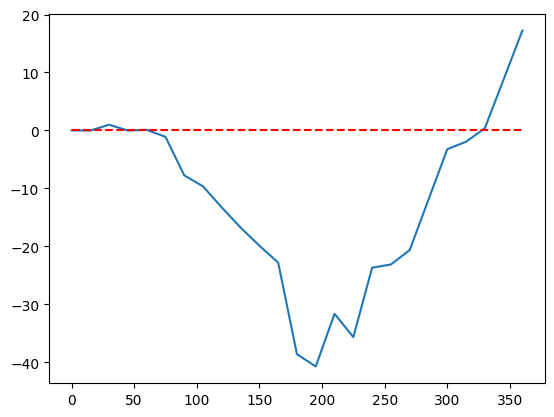

In [41]:
import matplotlib.pyplot as plt
import os

distances = [0, 781, 1508, 2339, 3112, 3954, 5079, 5957, 6926, 7885, 8827, 9758, 11359, 12248, 12555, 13543, 13700, 14450, 15100, 15754, 16466, 17124, 17806]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18702*360, "error: ", (angles[i] - d/18702*360))
    errors.append(angles[i] - d/18702*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    # print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
# plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  -380.41055256721575
Angle:  15 Distance:  1600 Distance in degree:  30.843373493975903 error:  -15.843373493975903
y_fit:  -246.04180356838322
Angle:  30 Distance:  2489 Distance in degree:  47.980722891566266 error:  -17.980722891566266
y_fit:  -180.34965379096508
Angle:  45 Distance:  2796 Distance in degree:  53.898795180722885 error:  -8.898795180722885
y_fit:  -150.24633498964664
Angle:  60 Distance:  3784 Distance in degree:  72.944578313253 error:  -12.944578313253004
y_fit:  -94.48967932250451
Angle:  75 Distance:  3942 Distance in degree:  75.99036144578312 error:  -0.9903614457831225
y_fit:  -74.0336492511664
Angle:  90 Distance:  4691 Distance in degree:  90.42891566265061 error:  -0.4289156626506099
y_fit:  -36.912466140058115
Angle:  105 Distance:  5342 Distance in degree:  102.97831325301203 error:  2.0216867469879674
y_fit:  -7.442353147636425
Angle:  120 Distance:  5996 Distance in degree:  115.58554216

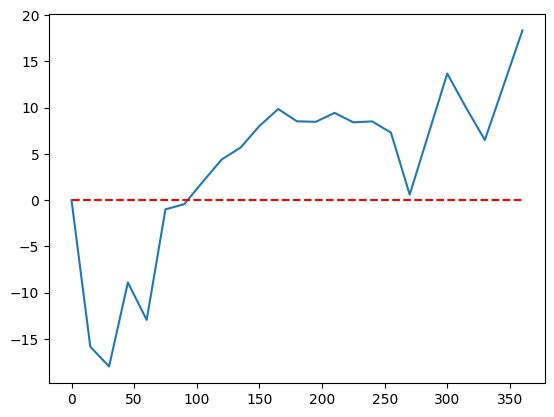

In [45]:
import matplotlib.pyplot as plt
import os

distances =  [0, 1600, 2489, 2796, 3784, 3942, 4691, 5342, 5996, 6708, 7365, 8048, 8895, 9676, 10404, 11235, 12008, 12849, 13975, 14852, 15822, 16781, 17723]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18675*360, "error: ", (angles[i] - d/18675*360))
    errors.append(angles[i] - d/18675*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
# plt.plot(angles, fitted, label="Fitted error")
plt.show()



Angle:  0 Distance:  0 Distance in degree:  0.0 error:  0.0
y_fit:  5.141815352996736
Angle:  15 Distance:  767 Distance in degree:  14.677084994418752 error:  0.3229150055812475
y_fit:  0.060643941402801715
Angle:  30 Distance:  1434 Distance in degree:  27.44059958539308 error:  2.5594004146069196
y_fit:  -1.4326713009174767
Angle:  45 Distance:  2089 Distance in degree:  39.974485727954075 error:  5.025514272045925
y_fit:  -1.816408920089323
Angle:  60 Distance:  2804 Distance in degree:  53.65651411258173 error:  6.343485887418268
y_fit:  -2.7615700554619522
Angle:  75 Distance:  3475 Distance in degree:  66.49657151969383 error:  8.50342848030617
y_fit:  -1.9888490453696903
Angle:  90 Distance:  4161 Distance in degree:  79.6236644873226 error:  10.3763355126774
y_fit:  -0.8661801576428161
Angle:  105 Distance:  5013 Distance in degree:  95.9272843246691 error:  9.072715675330898
y_fit:  -2.265371020681499
Angle:  120 Distance:  5802 Distance in degree:  111.02535480784563 error: 

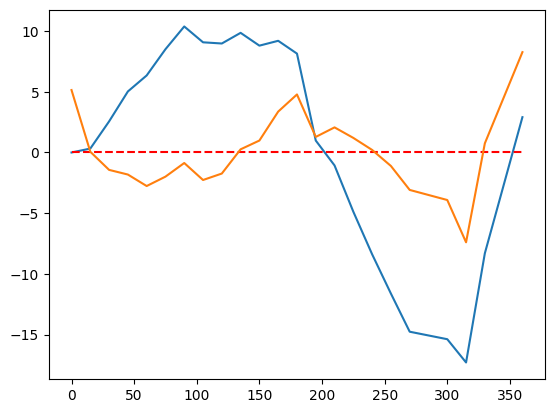

In [46]:
import matplotlib.pyplot as plt
import os

distances = [0, 767, 1434, 2089, 2804, 3475, 4161, 5013, 5802, 6540, 7379, 8142, 8981, 10139, 11030, 12013, 12980, 13933, 14881, 16481, 17365, 17679, 18661]
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 300, 315, 330, 360]
errors = []

folder = "images_manual_full"
panorama_curvature_params = np.load(os.path.join(folder, "panorama_curvature_params.npy"))
cubic_poly = np.poly1d(panorama_curvature_params)            # Create a polynomial function
fitted = []

for i, d in enumerate(distances):
    print("Angle: ", angles[i], "Distance: ", d, "Distance in degree: ", d/18813*360, "error: ", (angles[i] - d/18813*360))
    errors.append(angles[i] - d/18813*360 )
    y_fit = cubic_poly(d)
    fitted.append(angles[i] - y_fit)
    print("y_fit: ", angles[i] - y_fit)

plt.plot(angles, errors)
#zero line
plt.plot([0, 360], [0, 0], linestyle='--', color='red', label="Zero line")
#plot fited y
plt.plot(angles, fitted, label="Fitted error")
plt.show()

